# Desafio Kaggle: Titanic

- https://www.kaggle.com/c/titanic

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [29]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

---

### Importando os arquivos

In [31]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

---

### Visualizando os arquivos importados

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### verificar se os valores de um DataFrame ou Series são nulos (NaN)

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  informações detalhadas sobre um DataFrame, incluindo o número de entradas não nulas em cada coluna.

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
passengerId = test['PassengerId']

In [42]:
# titanic_df = train.append(test, ignore_index=True)(não usado mais)
titanic_df = pd.concat([train, test], ignore_index=True)

In [43]:
# Salvar PassengerId para auxiliar na criação do arquivo que será enviado ao Kaggle
passengerId = test['PassengerId']

# Criando um DF novo com o train e o test
titanic_df = pd.concat([train, test], ignore_index=True)

In [44]:
# Para auxiliar no momento separar o DF titanic_df em train e test
train_index = len(train)
test_index = len(titanic_df) - len(test)

In [45]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [46]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [47]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### fornece estatísticas descritivas sobre as colunas numéricas de um DataFrame.

In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# Criando o df onde iremos processar os modelos de ML

df = pd.DataFrame()

### Survived

### 'nunique' conta quantos valores distintos estão presentes na série ou coluna.

In [50]:
titanic_df['Survived'].nunique()

2

### 'unique' é útil para identificar os diferentes valores presentes em uma coluna e é comumente usada para categorizar ou criar resumos de dados.

In [52]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [53]:
titanic_df['Survived'].isnull().sum()

418

In [54]:
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

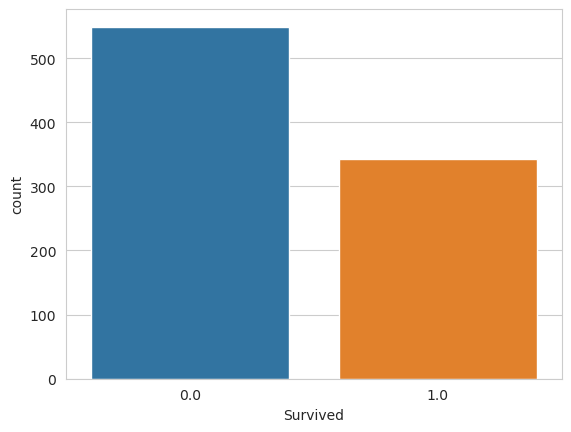

In [55]:
sns.countplot(data = titanic_df, x = 'Survived')

In [ ]:
# Criando uma função para ajudar no momento de visualizar as informações de cada coluna

def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)
    
    
titanic_func(titanic_df, 'Survived')

In [ ]:
df['Survived'] = titanic_df['Survived']

In [ ]:
df

### Pclass

In [ ]:
titanic_func(titanic_df, 'Pclass')

In [ ]:
df['Pclass'] = titanic_df['Pclass']
df.head()

### Sex

In [ ]:
titanic_df['Sex'].unique()

In [ ]:
# titanic_df['Sex'].map({'female': 1, 'male': 0})
titanic_df['Sex'] = titanic_df['Sex'].replace(['female', 'male'], [1, 0])

In [ ]:
titanic_func(titanic_df, 'Sex')

In [ ]:
df['Sex'] = titanic_df['Sex']
df.head()

### Age

In [ ]:
titanic_func(titanic_df, 'Age', False)

In [ ]:
titanic_df.corr()

In [ ]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

In [ ]:
titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()

In [ ]:
titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()

In [ ]:
for i in sorted(titanic_df['Pclass'].unique()):
    print(f"Pessoas da {i}ª classe tem a média de idade de: {titanic_df[titanic_df['Pclass'] == i]['Age'].mean():.0f} anos.")

In [ ]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].isnull().sum()

In [ ]:
titanic_df['Age'].isnull().sum()

In [ ]:
count = 0
for i in titanic_df.index:
    
    if pd.isnull(titanic_df['Age'][i]):
        
        if titanic_df['Pclass'][i] == 1:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0)
            
        elif titanic_df['Pclass'][i] == 2:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)
            
        elif titanic_df['Pclass'][i] == 3:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)
            
    else:
        continue

In [ ]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].isnull().sum()

In [ ]:
titanic_df['Age'].isnull().sum()

In [ ]:
titanic_df['Age']

In [ ]:
titanic_df.info()

In [ ]:
df['Age'] = titanic_df['Age']
df.head()

### SibSp

In [ ]:
titanic_func(titanic_df, 'SibSp')

In [ ]:
df['SibSp'] = titanic_df['SibSp']
df.head()

### Parch

In [ ]:
titanic_func(titanic_df, 'Parch')

In [ ]:
df['Parch'] = titanic_df['Parch']
df.head()

### Criando coluna - FamilySize 

In [ ]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 

In [ ]:
df['FamilySize'] = titanic_df['FamilySize']
df.head()

### Fare

In [ ]:
titanic_func(titanic_df, 'Fare', False)

In [ ]:
titanic_df[titanic_df['Fare'].isnull()]

In [ ]:
titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

In [ ]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [ ]:
titanic_df.isnull().sum()

In [ ]:
df['Fare'] = titanic_df['Fare']
df.head()

### Cabin

In [ ]:
titanic_df.head(2)

In [ ]:
titanic_df['Cabin'].isnull().sum()

In [ ]:
titanic_df['Cabin'].unique()

### Embarked

In [ ]:
titanic_func(titanic_df, 'Embarked')

In [ ]:
titanic_df[titanic_df['Embarked'] == "S"]['Survived'].mean()

In [ ]:
titanic_df[titanic_df['Embarked'] == "S"]['Pclass'].mean()

In [ ]:
titanic_df[titanic_df['Embarked'] == "C"]['Survived'].mean()

In [ ]:
titanic_df[titanic_df['Embarked'] == "C"]['Pclass'].mean()

In [ ]:
titanic_df[titanic_df['Embarked'] == "Q"]['Survived'].mean()

In [ ]:
titanic_df[titanic_df['Embarked'] == "Q"]['Pclass'].mean()

In [ ]:
titanic_df[titanic_df['Embarked'].isnull()]

In [ ]:
titanic_df['Embarked'].fillna('C', inplace = True)

In [ ]:
titanic_df.isnull().sum()

In [ ]:
df['Embarked'] = titanic_df['Embarked']
df.head()

### Name

In [ ]:
titanic_df.head()

In [ ]:
titanic_df['Name']

In [ ]:
# [titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [ ]:
titanic_df['Title'].nunique()

In [ ]:
titanic_df['Title'].unique()

In [ ]:
titanic_df['Title'].value_counts()

In [ ]:
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

In [ ]:
titanic_df

In [ ]:
df['Title'] = titanic_df['Title']
df.head()

In [ ]:
titanic_func(titanic_df, 'Title')

In [ ]:
titanic_df.isnull().sum()

---

In [ ]:
df

In [ ]:
pclass = pd.get_dummies(df['Pclass'], prefix = "Pclass", drop_first = True)
title = pd.get_dummies(df['Title'], prefix = 'Title', drop_first = True)
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)

In [ ]:
titanic_completo = pd.concat([df, pclass, title, embarked], axis = 1)

In [ ]:
titanic_completo.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)

In [ ]:
titanic_completo

In [ ]:
train = titanic_completo[:train_index].copy()
test = titanic_completo[test_index:].copy()

In [ ]:
train.info()

In [ ]:
train['Survived'] = train['Survived'].astype(int)

In [ ]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [ ]:
X_test = test.drop('Survived', axis = 1)

---

In [ ]:
# Função que processa o Algoritmo e retorna a acurácia

def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)    
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

### Random Forest

In [ ]:
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

### Logistic regression

In [ ]:
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação Cruzada: {acc_vc_log}")

### K-Nearest Neighbours

In [ ]:
acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação Cruzada: {acc_vc_knn}")

### Gaussian Naive Bayes

In [ ]:
acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação Cruzada: {acc_vc_gaussian}")

### Linear Support Vector Machines (SVC)

In [ ]:
acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação Cruzada: {acc_vc_linear_svc}")

### Stochastic Gradient Descent

In [ ]:
acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação Cruzada: {acc_vc_sgd}")

### Decision Tree Classifier

In [ ]:
acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f"Acurácia: {acc_dt}")
print(f"Acurácia Validação Cruzada: {acc_vc_dt}")

### Gradient Boost Trees

In [ ]:
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

---

### Artigo no Medium sobre como alterar os parâmetros

 - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
 - https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f
 - https://docs.aws.amazon.com/pt_br/machine-learning/latest/dg/cross-validation.html (PT-BR)

In [ ]:
params = dict(     
    max_depth = [n for n in range(1, 5)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 6)],     
    n_estimators = [n for n in range(10, 50, 10)],
)

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc_cv = GridSearchCV(estimator = gbc, param_grid = params, cv = 10) 
gbc_cv.fit(X, y)

In [ ]:
print(f"Melhor pontuação: {gbc_cv.best_score_}")
print(f"Melhores parâmetros: {gbc_cv.best_estimator_}")

In [ ]:
gradientBoostingClassifier_pred = gbc_cv.predict(X_test)

In [ ]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': gradientBoostingClassifier_pred})
# save to csv
kaggle.to_csv('./titanic_gradient_boosting_pred.csv', index=False)

---